In [9]:
#import data handling libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#read in the main dataset
df = pd.read_csv('final_dataset_Nov_26.csv')

df

,ENT_SEM,GRAD_SEM,25,101,104,105,106,140,142,143,...,SEM6.0_cdf,SEM6.5_cdf,SEM7.0_cdf,SEM7.5_cdf,SEM8.0_cdf,SEM8.5_cdf,SEM9.0_cdf,SEM9.5_cdf,slope,intercept
0,20.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1.368421e-01,5.444869e-17
1,19.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,3,3,3,3,2.701754e-01,1.017544e+00
2,19.6,3.4,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1.543860e-01,-1.929825e-01
3,16.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,6,6,6,7,7,7,7.824561e-01,3.508772e-02
4,18.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,-2.363863e-17,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,14.6,4.8,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,-2,-2,-2,-2,-2,-2,-2,-2,-1.368421e-01,-1.052632e+00
9052,16.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,8.421053e-02,4.210526e-01
9053,13.6,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1.543860e-01,1.929825e-01
9054,14.6,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,2,2,2,2,2.385965e-01,7.017544e-02


In [10]:
df['Y'].value_counts()

Y
1    4682
0    4374
Name: count, dtype: int64

In [11]:
df['SEM9.5_cdf'].value_counts()

SEM9.5_cdf
 1     4607
 2     1428
-1     1122
 3      542
 0      409
 4      261
 5      135
-2       98
 6       80
 7       79
 8       53
 10      51
 11      50
 9       49
 12      36
 13      29
 14      12
-3        7
 15       4
 16       2
 18       1
 17       1
Name: count, dtype: int64

In [12]:
df.columns

Index(['ENT_SEM', 'GRAD_SEM', '25', '101', '104', '105', '106', '140', '142',
       '143', '150', '151', '160', '165', '166', '181', '201', '207', '240',
       '265', '266', '267', '301', '302', '304', '314', '317', '341', '342',
       '350', '365', '373', '385', '397', '414', '415', '435', '436', '492',
       '495', '500', 'Y', 'SEM0.5', 'SEM1.0', 'SEM1.5', 'SEM2.0', 'SEM2.5',
       'SEM3.0', 'SEM3.5', 'SEM4.0', 'SEM4.5', 'SEM5.0', 'SEM5.5', 'SEM6.0',
       'SEM6.5', 'SEM7.0', 'SEM7.5', 'SEM8.0', 'SEM8.5', 'SEM9.0', 'SEM9.5',
       'SEM0.5_cdf', 'SEM1.0_cdf', 'SEM1.5_cdf', 'SEM2.0_cdf', 'SEM2.5_cdf',
       'SEM3.0_cdf', 'SEM3.5_cdf', 'SEM4.0_cdf', 'SEM4.5_cdf', 'SEM5.0_cdf',
       'SEM5.5_cdf', 'SEM6.0_cdf', 'SEM6.5_cdf', 'SEM7.0_cdf', 'SEM7.5_cdf',
       'SEM8.0_cdf', 'SEM8.5_cdf', 'SEM9.0_cdf', 'SEM9.5_cdf', 'slope',
       'intercept'],
      dtype='object')

In [13]:
courses = ['25', '101', '104', '105', '106', '140', '142',
       '143', '150', '151', '160', '165', '166', '181', '201', '207', '240',
       '265', '266', '267', '301', '302', '304', '314', '317', '341', '342',
       '350', '365', '373', '385', '397', '414', '415', '435', '436', '492',
       '495', '500']

SEM_columns = ['ENT_SEM','SEM0.5', 'SEM1.0', 'SEM1.5', 'SEM2.0', 'SEM2.5',
       'SEM3.0', 'SEM3.5', 'SEM4.0', 'SEM4.5', 'SEM5.0', 'SEM5.5', 'SEM6.0',
       'SEM6.5', 'SEM7.0', 'SEM7.5', 'SEM8.0', 'SEM8.5', 'SEM9.0', 'SEM9.5', 
       'SEM0.5_cdf', 'SEM1.0_cdf', 'SEM1.5_cdf', 'SEM2.0_cdf',
       'SEM2.5_cdf', 'SEM3.0_cdf', 'SEM3.5_cdf', 'SEM4.0_cdf', 'SEM4.5_cdf',
       'SEM5.0_cdf', 'SEM5.5_cdf', 'SEM6.0_cdf', 'SEM6.5_cdf', 'SEM7.0_cdf',
       'SEM7.5_cdf', 'SEM8.0_cdf', 'SEM8.5_cdf', 'SEM9.0_cdf', 'SEM9.5_cdf', 'slope', 'intercept']

all_features = courses + SEM_columns

print('Number of features:', len(all_features))

print('Overall grad rate:', df['Y'].mean())

random_states = [5917, 656, 4125, 2797, 9936]
print('Random states:', random_states)

Number of features: 80
Overall grad rate: 0.5170053003533569
Random states: [5917, 656, 4125, 2797, 9936]


In [14]:
splits = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[all_features], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

In [18]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:hinge'],
    'eval_metric': ['logloss'],
}

xgb_models = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models):
    y_pred = search.predict(splits[i][1])
    xgb_df.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df.loc[i, 'test_accuracy'] = accuracy_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_precision'] = precision_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_recall'] = recall_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_f1'] = f1_score(splits[i][3], y_pred)
xgb_df

Best accuracy for split 0:  68.070%
Best accuracy for split 1:  68.098%
Best accuracy for split 2:  69.105%
Best accuracy for split 3:  68.816%
Best accuracy for split 4:  68.333%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.6807,0.682119,0.695558,0.685165,0.690323
1,0.680979,0.701987,0.712755,0.709712,0.71123
2,0.691051,0.683223,0.704162,0.66809,0.685652
3,0.688156,0.677704,0.688367,0.688367,0.688367
4,0.683326,0.687638,0.689479,0.720384,0.704593


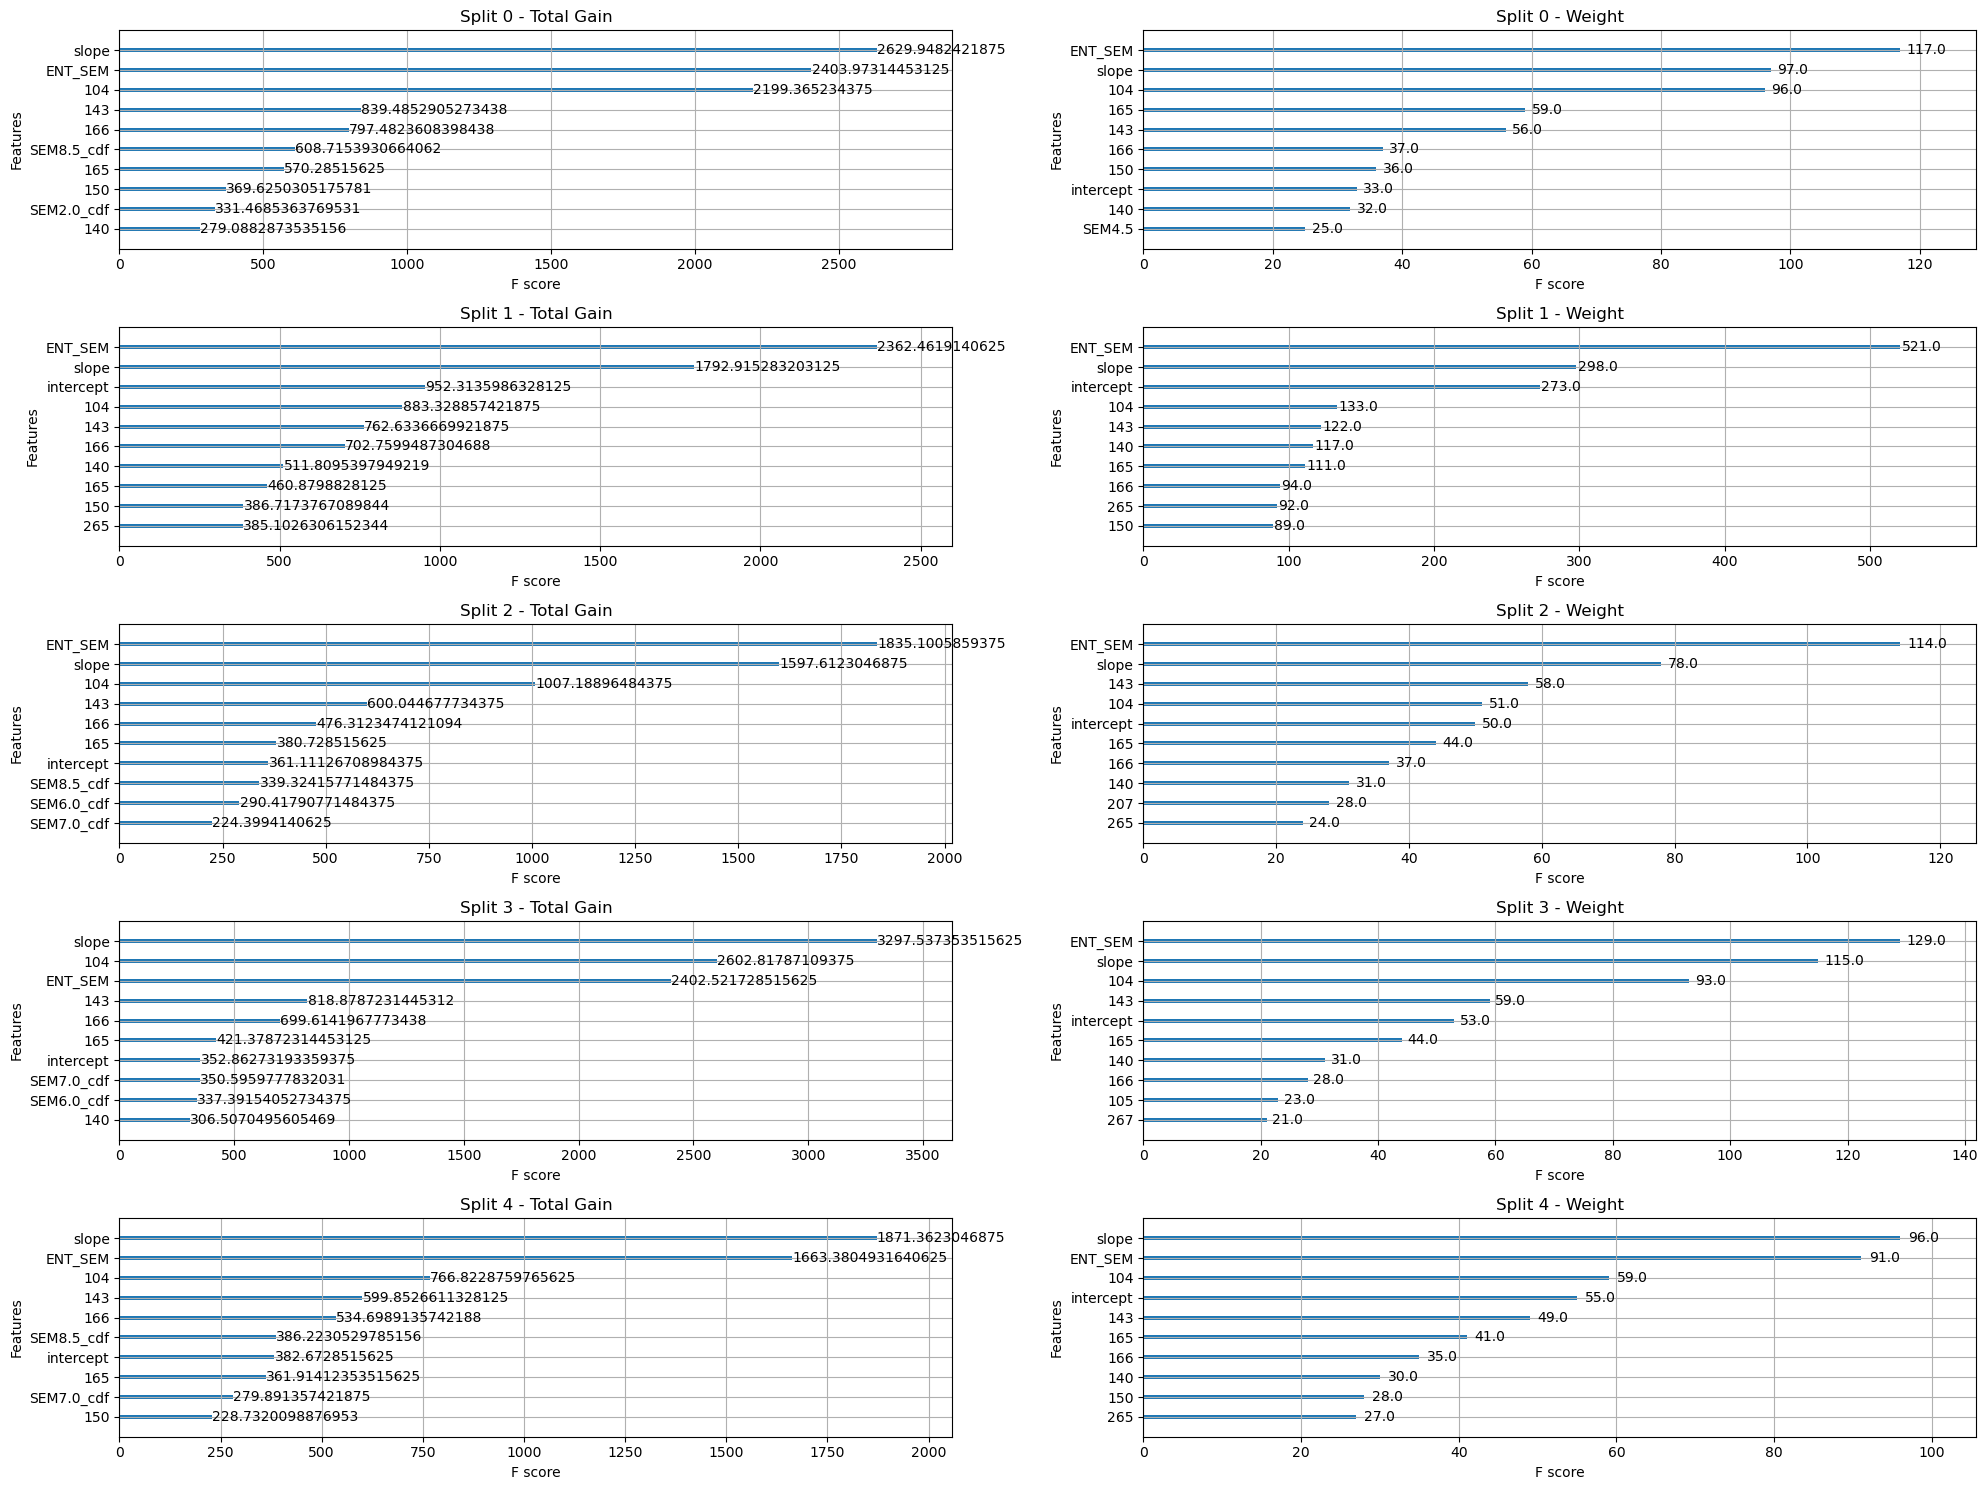

In [19]:
# Create a 5x2 grid of subplots
fig, ax = plt.subplots(5, 2, figsize=(20, 15))

for i, search in enumerate(xgb_models):
    # Plot gain on the left
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i, 0], 
                        importance_type='total_gain', 
                        max_num_features=10,
                        title=f'Split {i} - Total Gain')
    ax[i, 0].set_ylabel('Features')
    ax[i, 0].set_xlabel('F score')
    
    # Plot weight on the right
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i, 1], 
                        importance_type='weight', 
                        max_num_features=10,
                        title=f'Split {i} - Weight')
    ax[i, 1].set_ylabel('Features')
    ax[i, 1].set_xlabel('F score')

plt.tight_layout()
plt.show()


In [26]:
features2 = ['ENT_SEM', 'SEM9.5_cdf','slope','intercept']

splits_2 = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features2], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_2.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models_2 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_2):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_2.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

Best accuracy for split 0:  62.797%
Best accuracy for split 1:  62.714%
Best accuracy for split 2:  63.666%
Best accuracy for split 3:  63.280%
Best accuracy for split 4:  63.100%


In [27]:
#get the top 20 courses with largest enrollment (i.e. non-zero values in the dataset)
top_courses = df[courses].abs().sum().sort_values(ascending=False).index[:20].to_list()
top_courses

['166',
 '265',
 '165',
 '104',
 '207',
 '140',
 '150',
 '317',
 '201',
 '414',
 '143',
 '301',
 '267',
 '492',
 '266',
 '105',
 '341',
 '160',
 '435',
 '436']

In [28]:
features_3 = ['ENT_SEM', 'SEM9.5_cdf','slope','intercept','SEM4.5_cdf','SEM2.0_cdf'] + top_courses
splits_3 = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features_3], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_3.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models_3 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_3):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_3.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

Best accuracy for split 0:  68.912%
Best accuracy for split 1:  68.499%
Best accuracy for split 2:  69.036%
Best accuracy for split 3:  69.092%
Best accuracy for split 4:  68.622%


In [29]:
xgb_df_3 = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_3):
    y_pred = search.predict(splits_3[i][1])
    xgb_df_3.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_3.loc[i, 'test_accuracy'] = accuracy_score(splits_3[i][3], y_pred)
    xgb_df_3.loc[i, 'test_precision'] = precision_score(splits_3[i][3], y_pred)
    xgb_df_3.loc[i, 'test_recall'] = recall_score(splits_3[i][3], y_pred)
    xgb_df_3.loc[i, 'test_f1'] = f1_score(splits_3[i][3], y_pred)
xgb_df_3

,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.689121,0.693157,0.713805,0.678762,0.695842
1,0.684985,0.690949,0.713961,0.671291,0.691969
2,0.690362,0.66777,0.697291,0.631804,0.662934
3,0.690916,0.677704,0.703576,0.651014,0.676275
4,0.686224,0.698675,0.72394,0.674493,0.698343


In [34]:
#for each model in xgb_models_3, get the top 10 features by gain along with the top 10 features by weight. combine these into a single list. Then, combine all of these lists into a single list of features. Finally, print the unique features in this list, along with the length of this list.
best_features = []
for search in xgb_models_3:
    best_features.extend(search.best_estimator_.get_booster().get_score(importance_type='gain').keys())
    best_features.extend(search.best_estimator_.get_booster().get_score(importance_type='weight').keys())

best_features = list(set(best_features))
print(f'There are {len(best_features)} features to consider:')
best_features

There are 26 features to consider:


['317',
 'SEM2.0_cdf',
 '140',
 '265',
 'SEM4.5_cdf',
 '150',
 '267',
 '201',
 '414',
 '301',
 'ENT_SEM',
 'intercept',
 'SEM9.5_cdf',
 '104',
 '266',
 '166',
 '105',
 '143',
 'slope',
 '436',
 '435',
 '160',
 '492',
 '165',
 '207',
 '341']

In [35]:
features_4 = best_features
splits_4 = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features_4], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_4.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models_4 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_4):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_4.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df_4 = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_4):
    y_pred = search.predict(splits_4[i][1])
    xgb_df_4.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_4.loc[i, 'test_accuracy'] = accuracy_score(splits_4[i][3], y_pred)
    xgb_df_4.loc[i, 'test_precision'] = precision_score(splits_4[i][3], y_pred)
    xgb_df_4.loc[i, 'test_recall'] = recall_score(splits_4[i][3], y_pred)
    xgb_df_4.loc[i, 'test_f1'] = f1_score(splits_4[i][3], y_pred)
xgb_df_4

Best accuracy for split 0:  68.857%
Best accuracy for split 1:  68.554%
Best accuracy for split 2:  69.257%
Best accuracy for split 3:  69.299%
Best accuracy for split 4:  68.622%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.688568,0.693709,0.71754,0.672359,0.694215
1,0.685538,0.693157,0.720231,0.664888,0.691454
2,0.69257,0.67053,0.697216,0.641409,0.668149
3,0.692986,0.6766,0.700571,0.654216,0.6766
4,0.686225,0.68819,0.709459,0.672359,0.690411


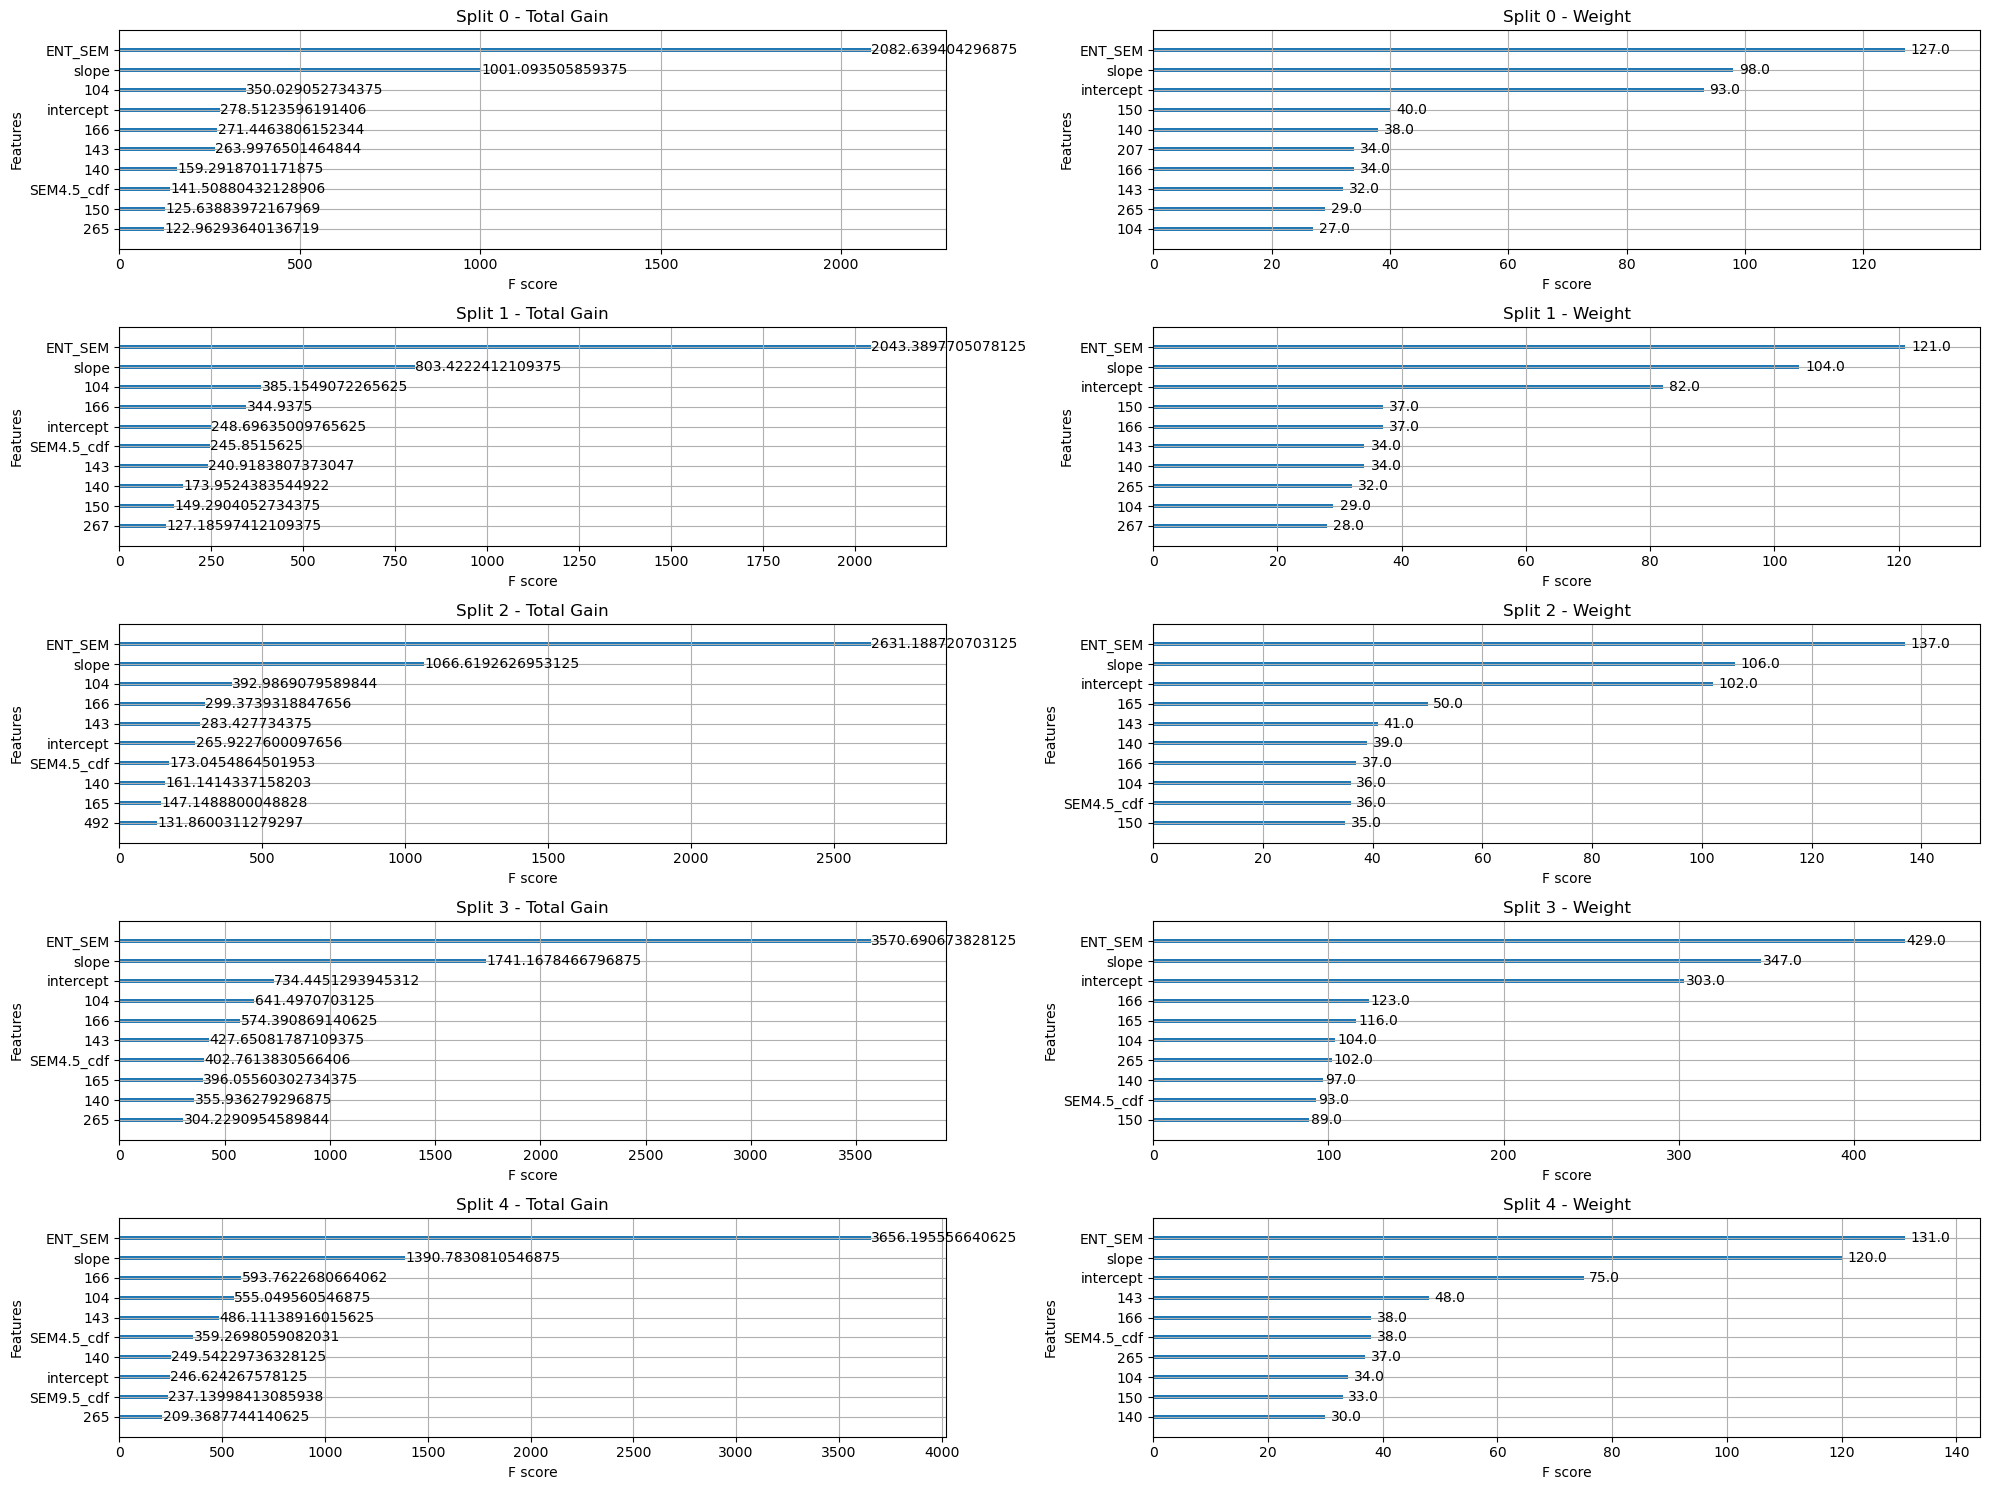

In [ ]:
# Create a 5x2 grid of subplots
fig, ax = plt.subplots(5, 2, figsize=(20, 15))

for i, search in enumerate(xgb_models_3):
    # Plot gain on the left
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i, 0], 
                        importance_type='total_gain', 
                        max_num_features=10,
                        title=f'Split {i} - Total Gain')
    ax[i, 0].set_ylabel('Features')
    ax[i, 0].set_xlabel('F score')
    
    # Plot weight on the right
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i, 1], 
                        importance_type='weight', 
                        max_num_features=10,
                        title=f'Split {i} - Weight')
    ax[i, 1].set_ylabel('Features')
    ax[i, 1].set_xlabel('F score')

plt.tight_layout()
plt.show()


In [38]:
#once again, get the top 5 features by gain and weight for each model in xgb_models_4. combine these into a single list. Then, combine all of these lists into a single list of features. Finally, print the unique features in this list, along with the length of this list.
best_features_2 = []
for search in xgb_models_4:
    gain_importance = search.best_estimator_.get_booster().get_score(importance_type='gain')
    weight_importance = search.best_estimator_.get_booster().get_score(importance_type='weight')
    
    top_gain_features = sorted(gain_importance, key=gain_importance.get, reverse=True)[:10]
    top_weight_features = sorted(weight_importance, key=weight_importance.get, reverse=True)[:10]
    
    best_features_2.extend(top_gain_features)
    best_features_2.extend(top_weight_features)

best_features_2 = list(set(best_features_2))
print(f'There are {len(best_features_2)} features to consider:')
best_features_2

There are 19 features to consider:


['317',
 '140',
 '265',
 'SEM4.5_cdf',
 '150',
 '267',
 '414',
 '301',
 'ENT_SEM',
 'intercept',
 '104',
 'SEM9.5_cdf',
 '266',
 '166',
 '143',
 'slope',
 '160',
 '492',
 '165']

In [40]:
features_5 = best_features_2
splits_5 = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features_5], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_5.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models_5 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_5):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_5.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df_5 = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_5):
    y_pred = search.predict(splits_5[i][1])
    xgb_df_5.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_5.loc[i, 'test_accuracy'] = accuracy_score(splits_5[i][3], y_pred)
    xgb_df_5.loc[i, 'test_precision'] = precision_score(splits_5[i][3], y_pred)
    xgb_df_5.loc[i, 'test_recall'] = recall_score(splits_5[i][3], y_pred)
    xgb_df_5.loc[i, 'test_f1'] = f1_score(splits_5[i][3], y_pred)
xgb_df_5

Best accuracy for split 0:  68.167%
Best accuracy for split 1:  67.505%
Best accuracy for split 2:  68.236%
Best accuracy for split 3:  68.360%
Best accuracy for split 4:  67.642%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.681665,0.680464,0.710588,0.64461,0.675993
1,0.675045,0.691501,0.725,0.649947,0.685425
2,0.682356,0.658389,0.673203,0.659552,0.666307
3,0.683601,0.666115,0.693473,0.635005,0.662953
4,0.676423,0.692053,0.729141,0.643543,0.683673


In [41]:
# continuous_features = ['SEM4.5_cdf',
#                         'ENT_SEM',
#                         'intercept',
#                         'SEM9.5_cdf',
#                         'slope']
features_3

['ENT_SEM',
 'SEM9.5_cdf',
 'slope',
 'intercept',
 'SEM4.5_cdf',
 'SEM2.0_cdf',
 '166',
 '265',
 '165',
 '104',
 '207',
 '140',
 '150',
 '317',
 '201',
 '414',
 '143',
 '301',
 '267',
 '492',
 '266',
 '105',
 '341',
 '160',
 '435',
 '436']

/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/seaborn/axisgrid.py:1696: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


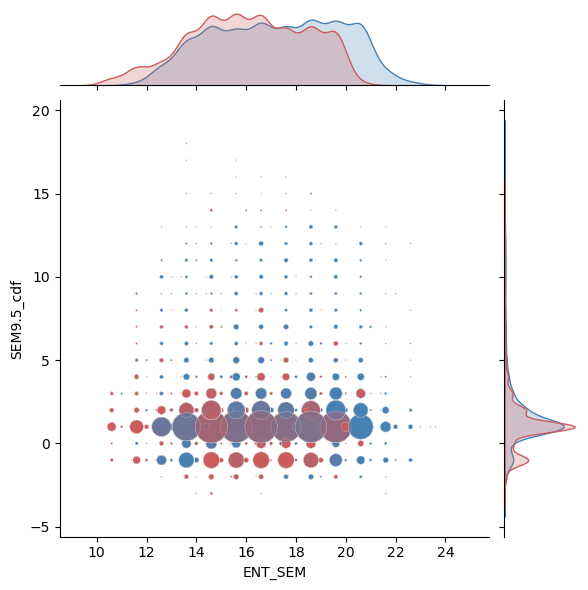

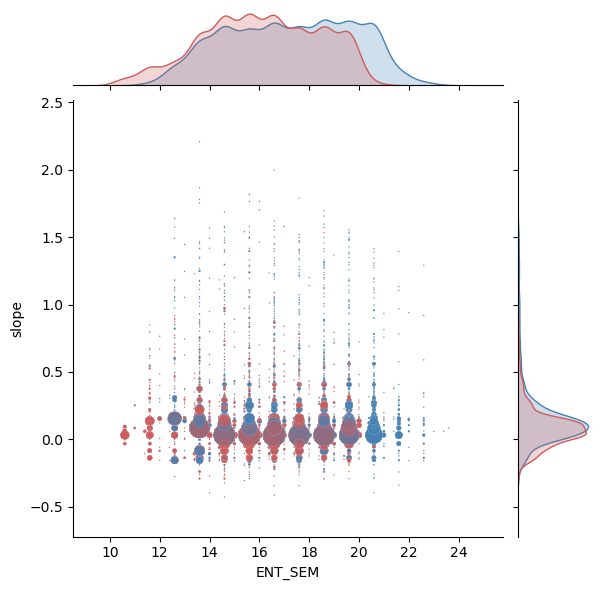

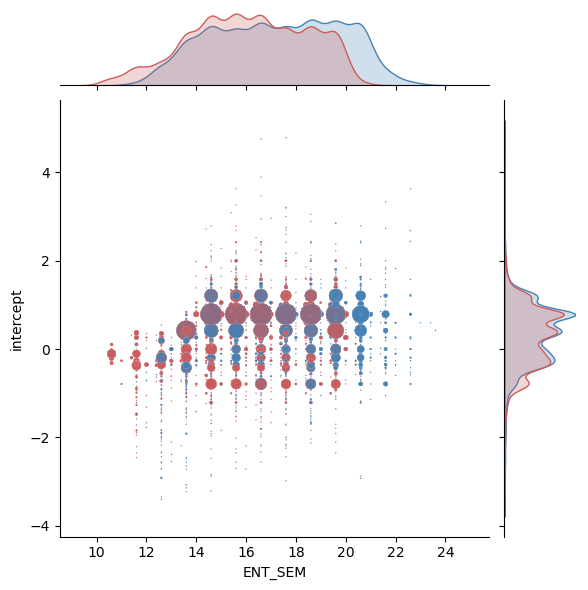

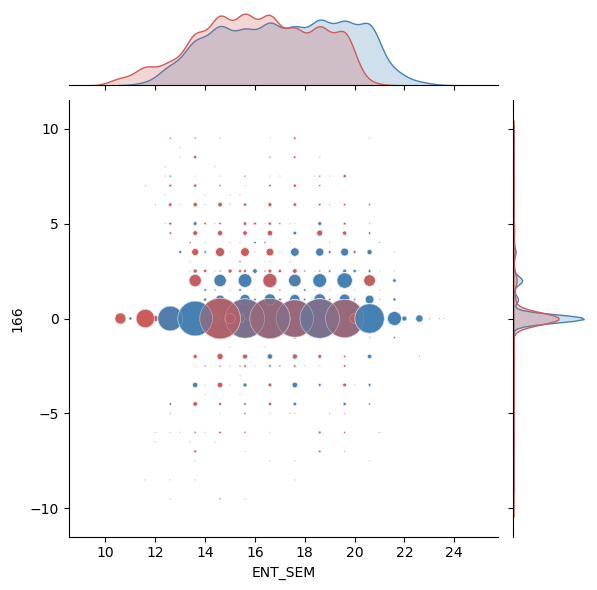

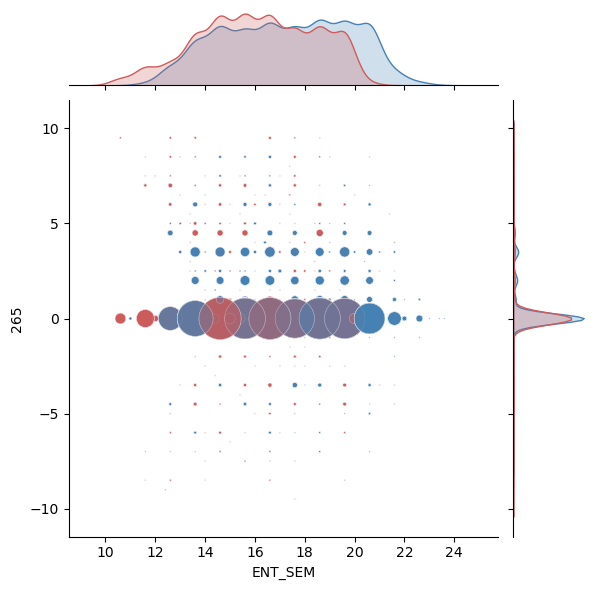

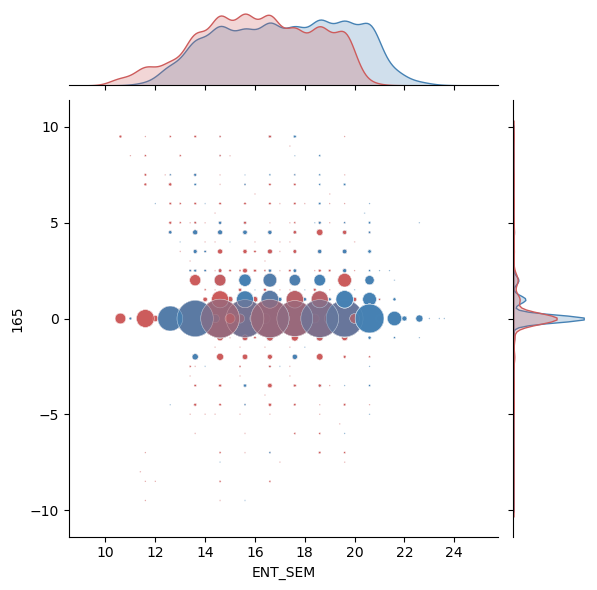

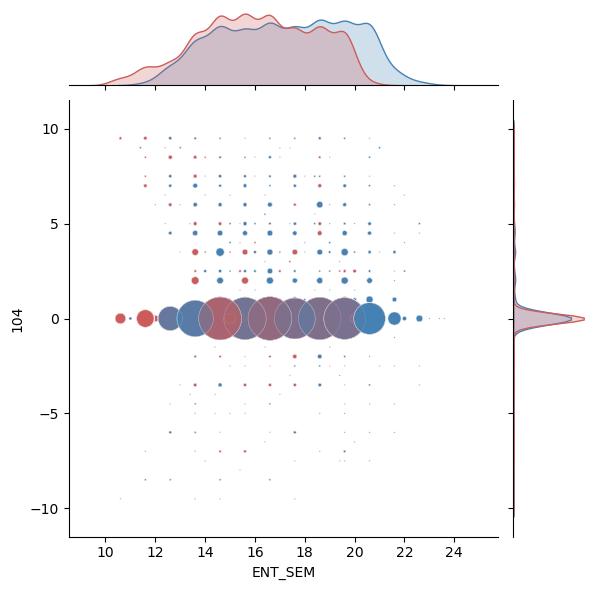

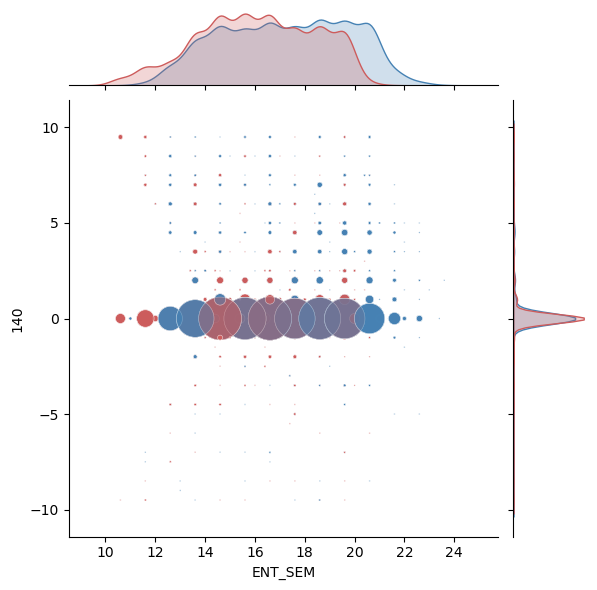

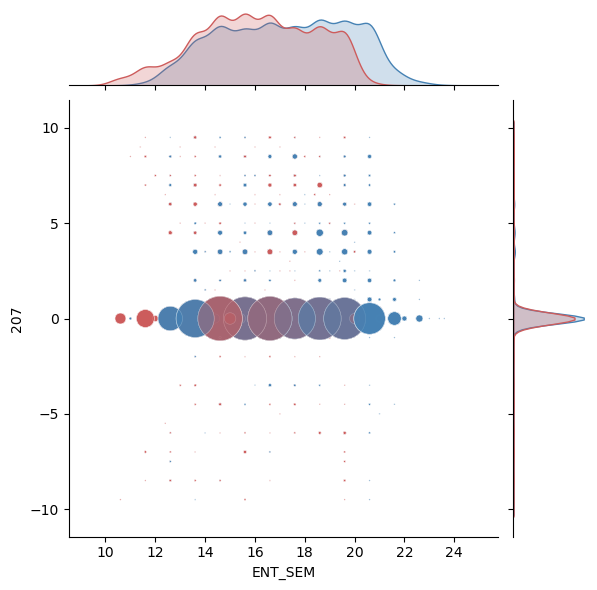

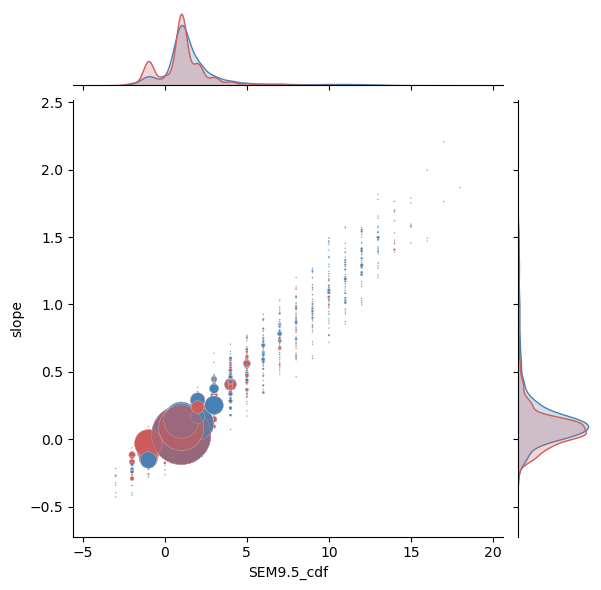

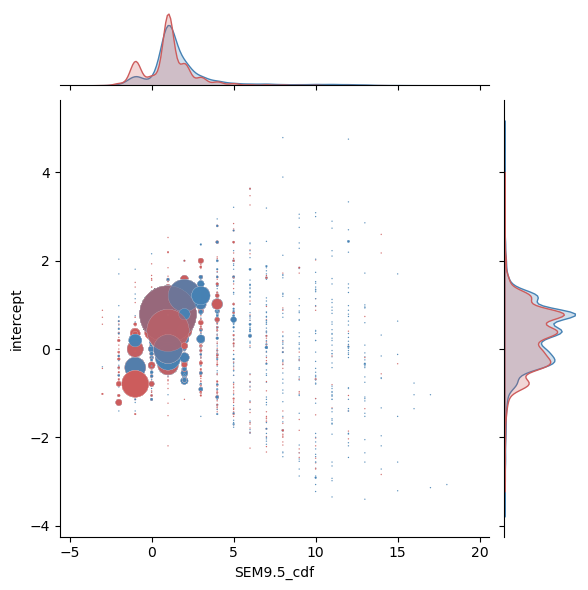

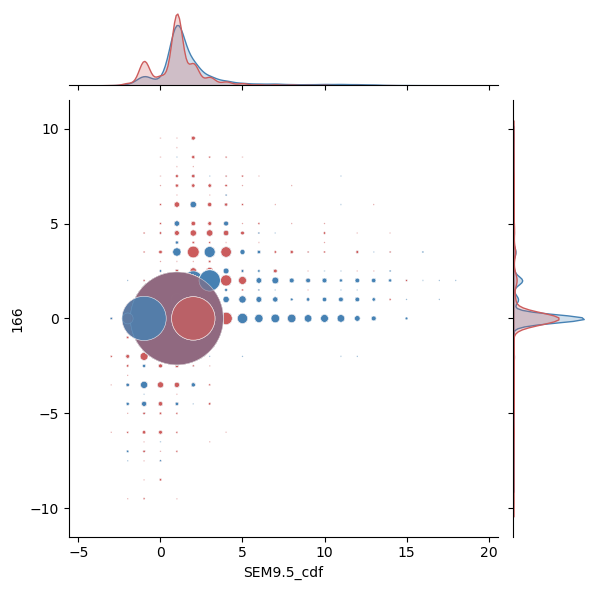

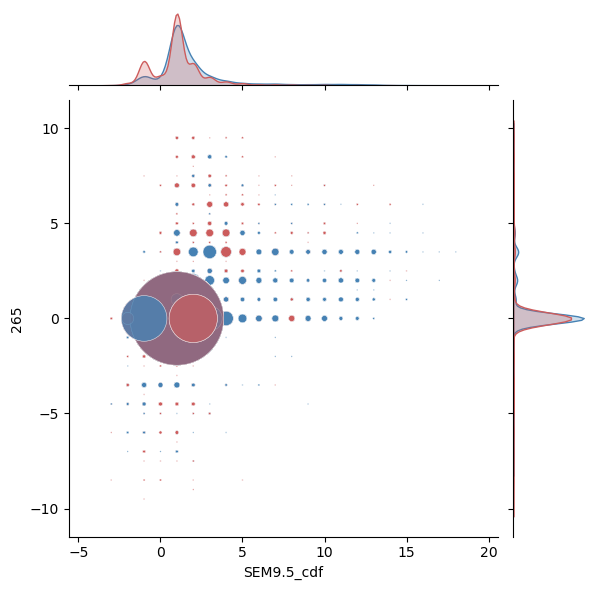

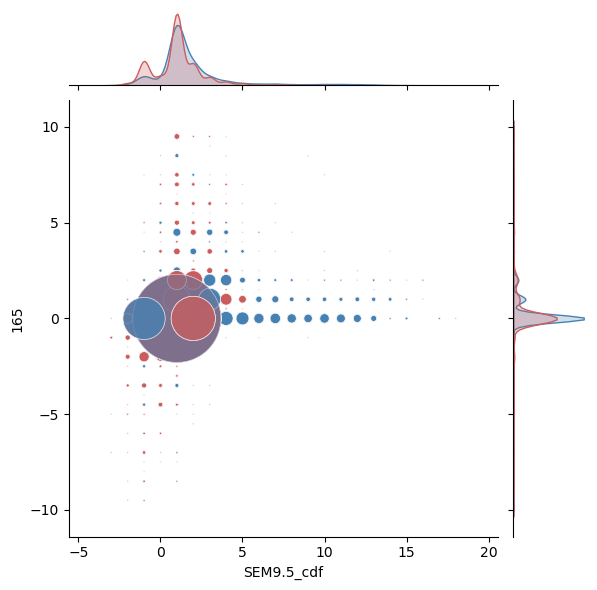

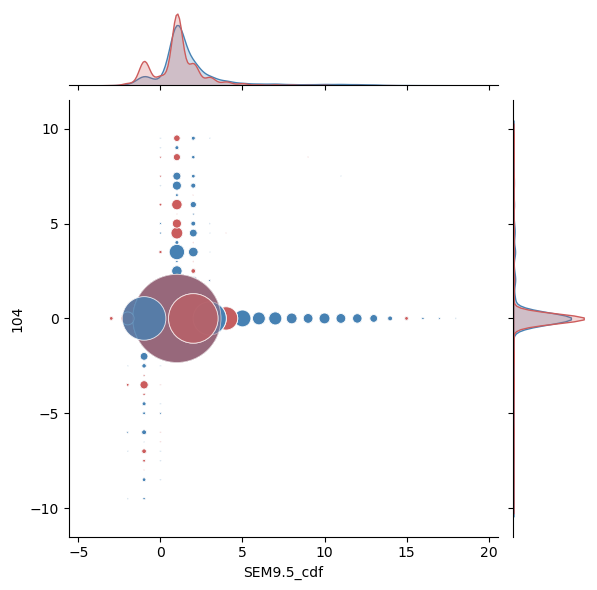

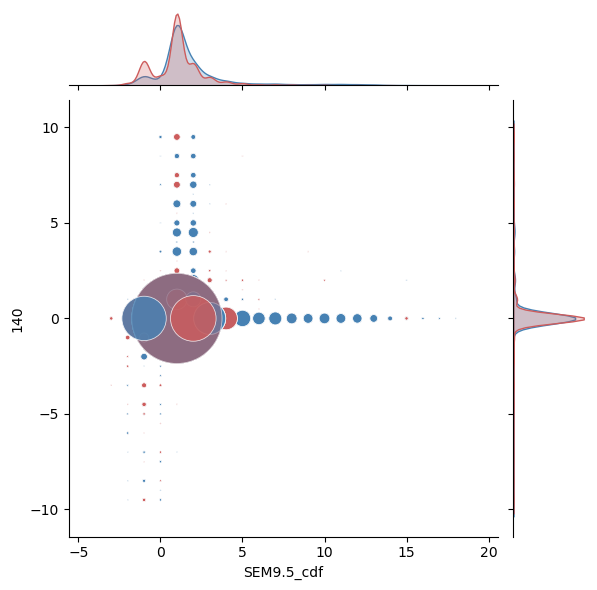

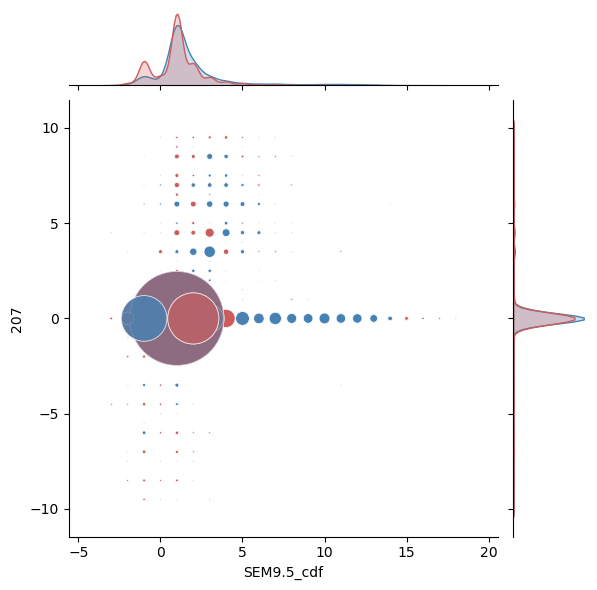

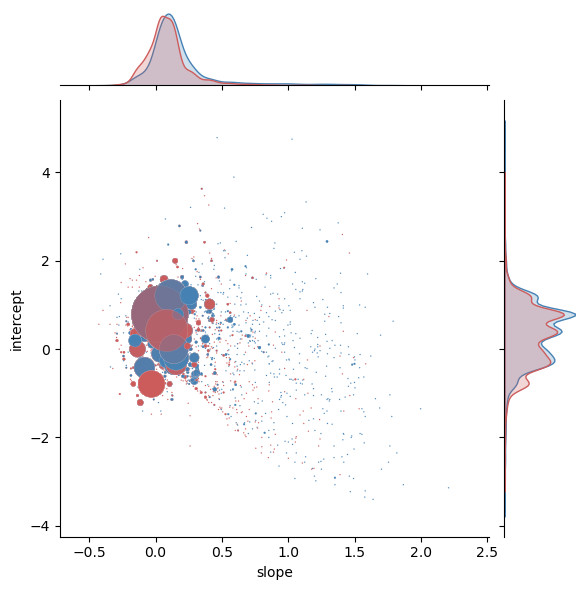

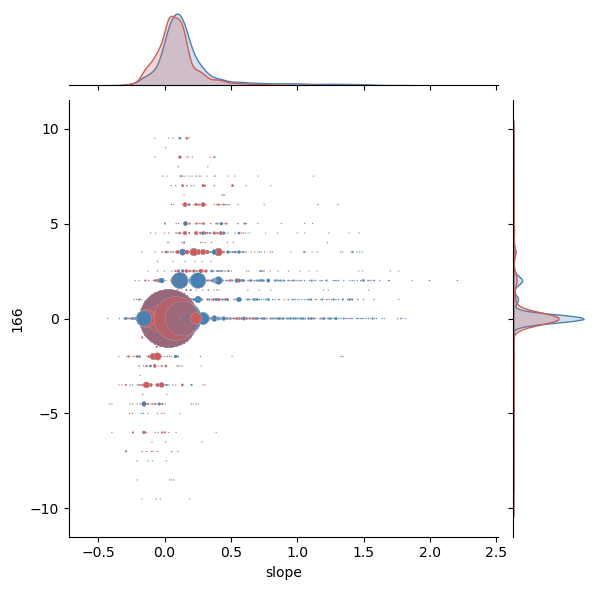

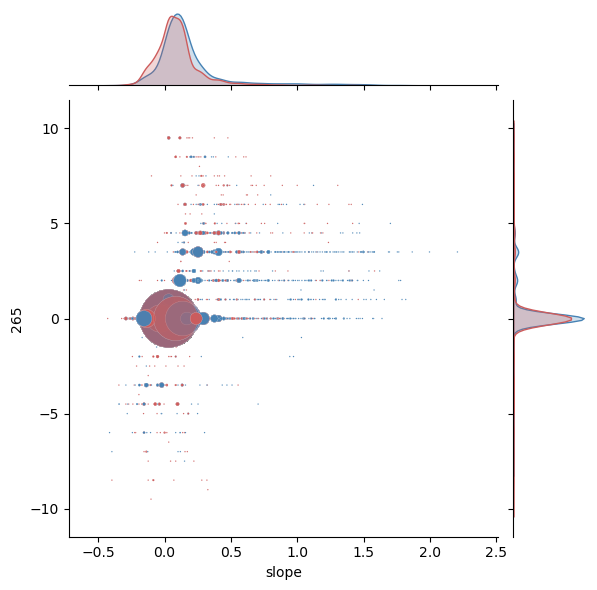

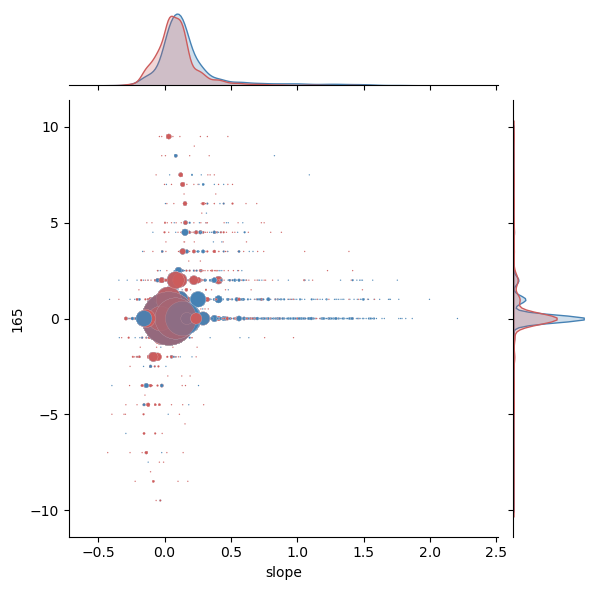

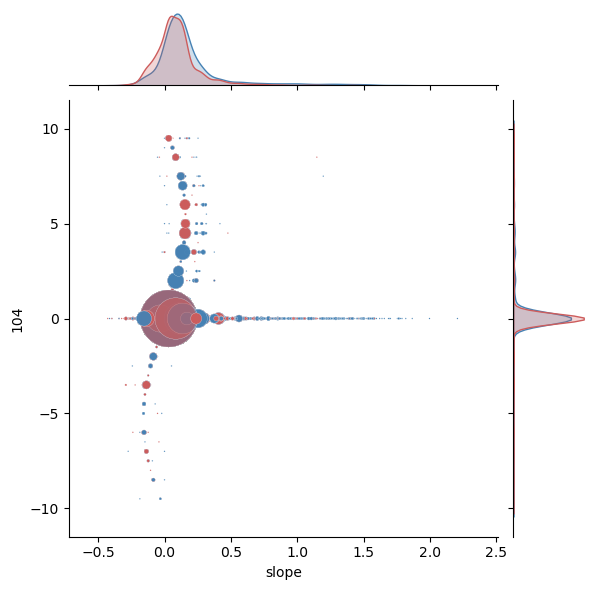

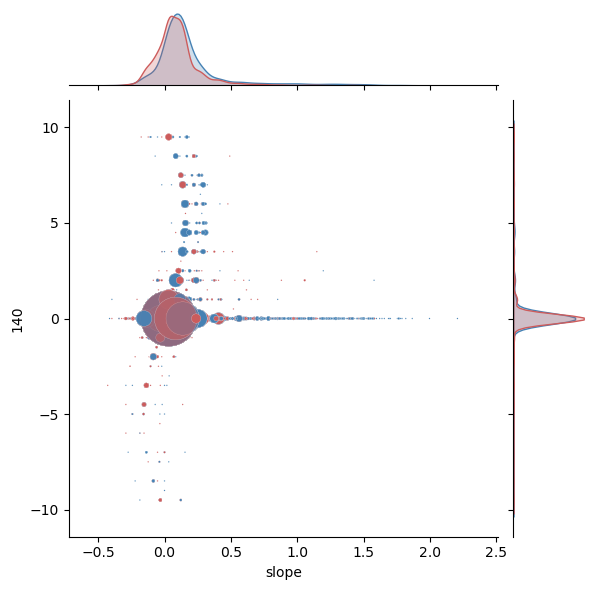

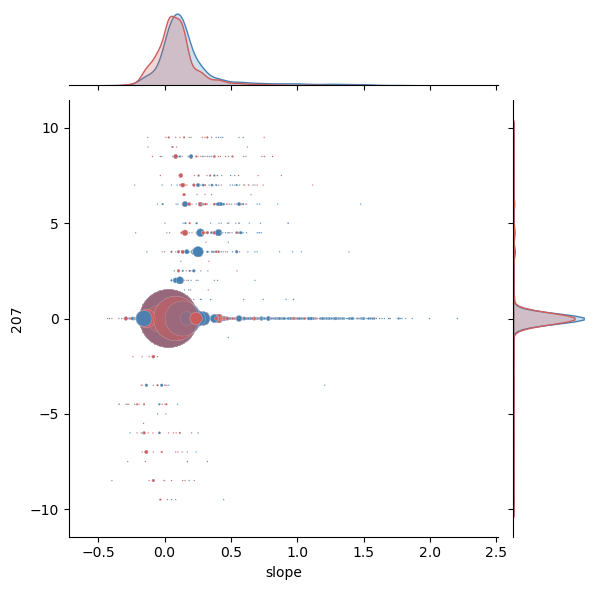

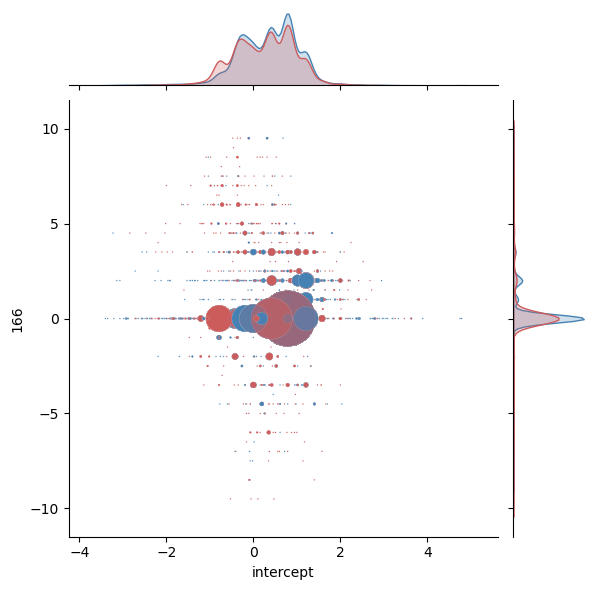

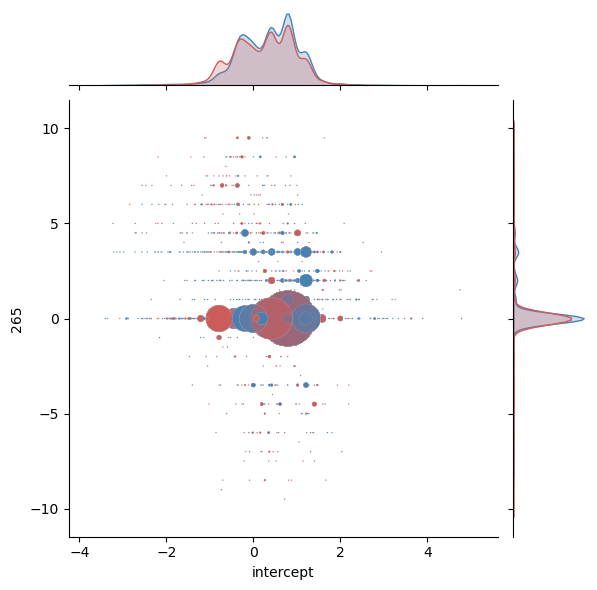

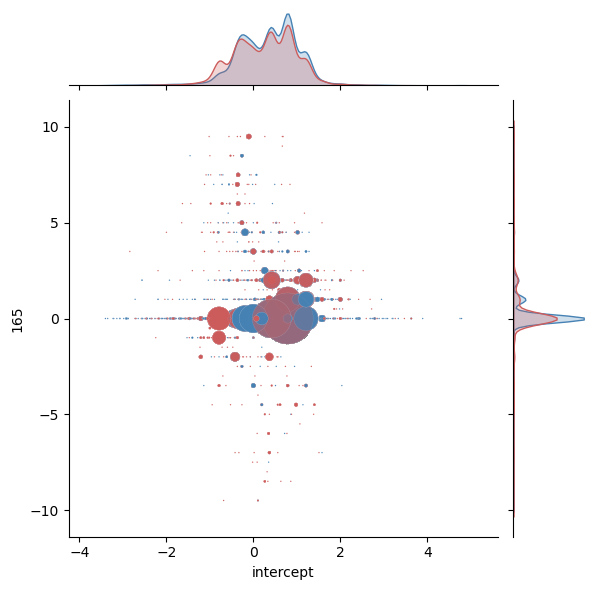

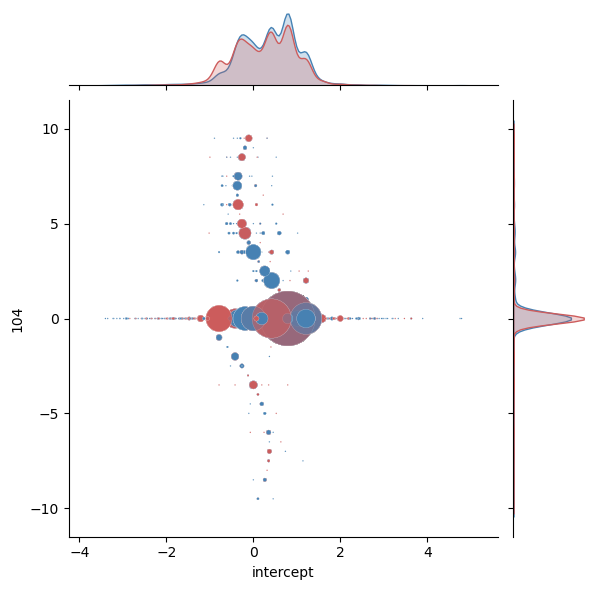

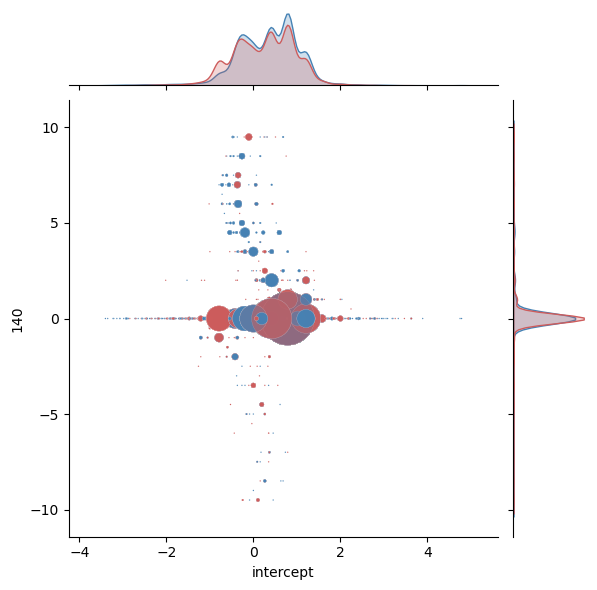

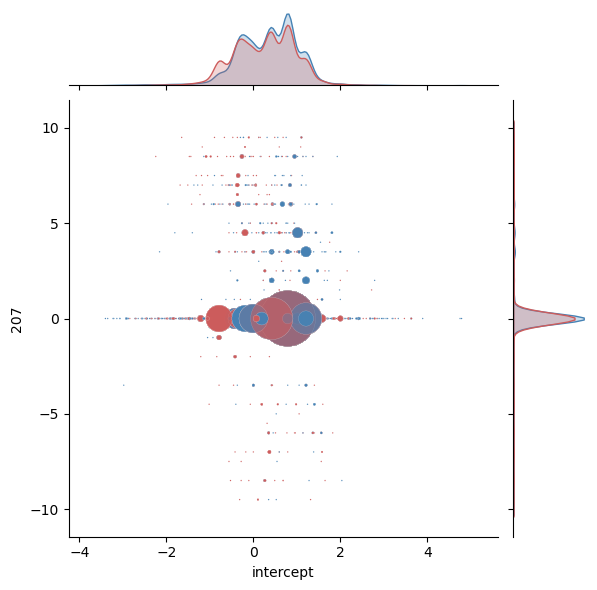

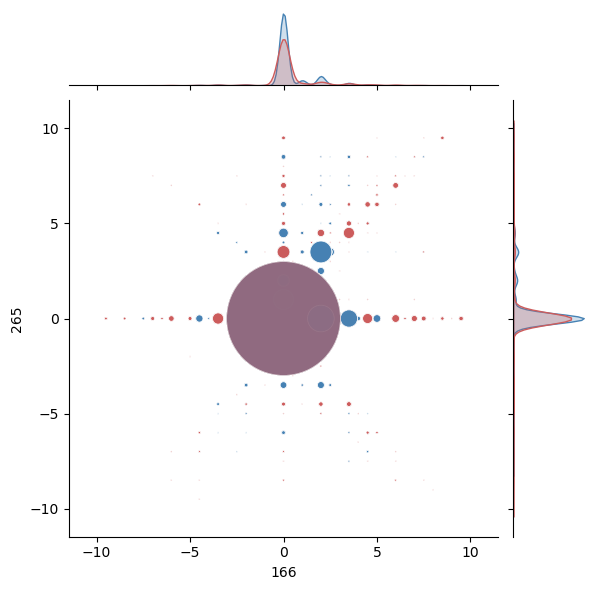

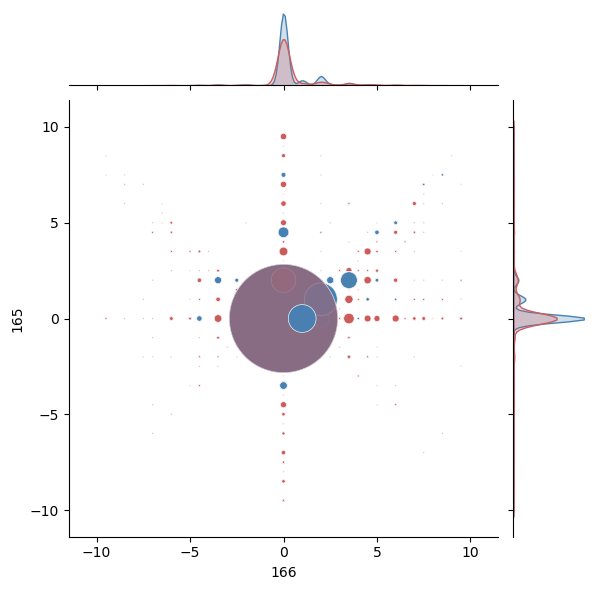

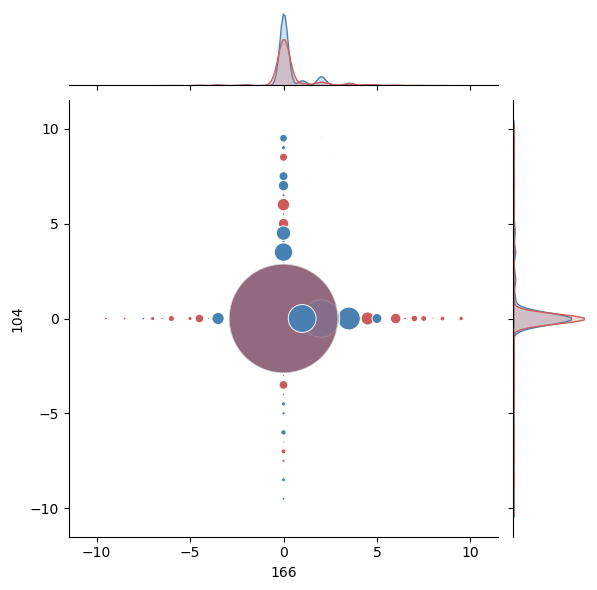

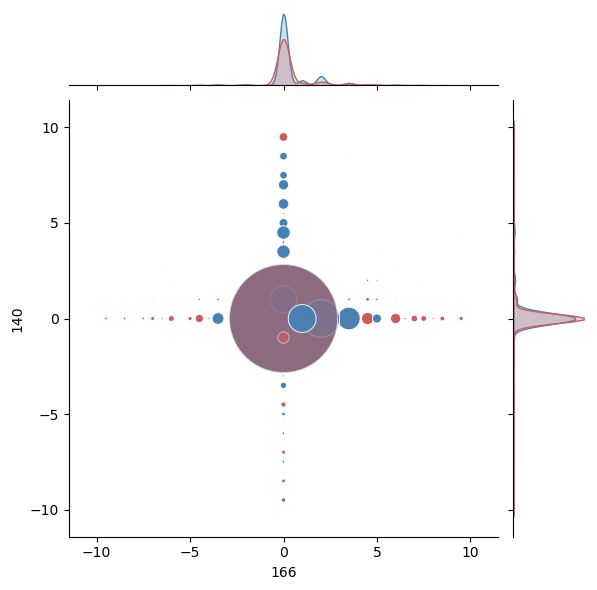

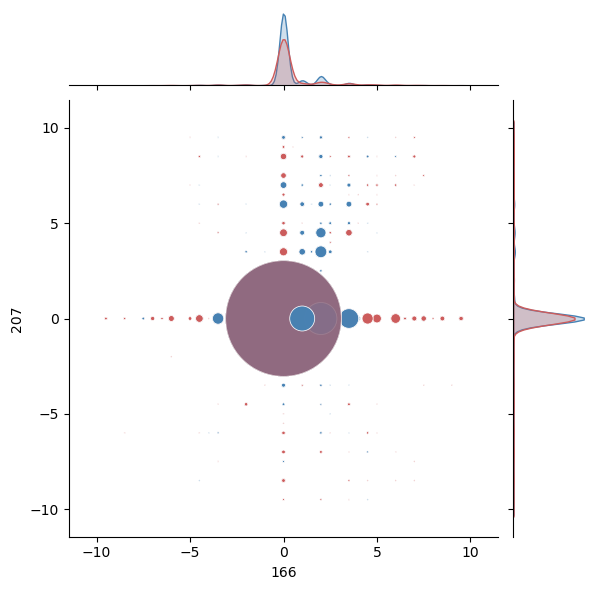

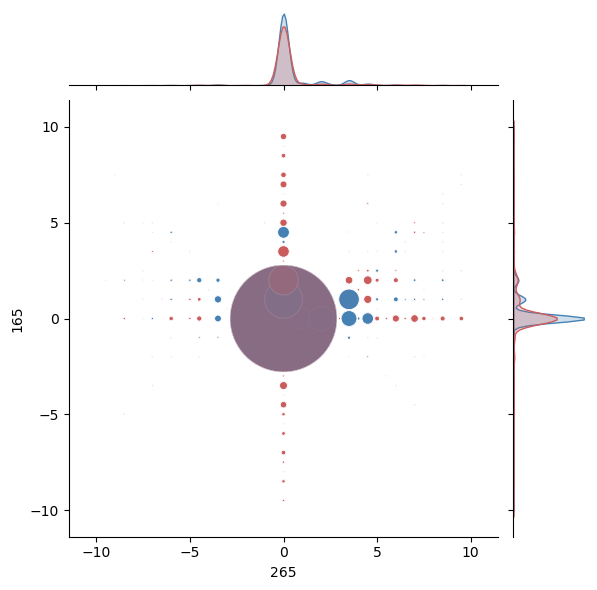

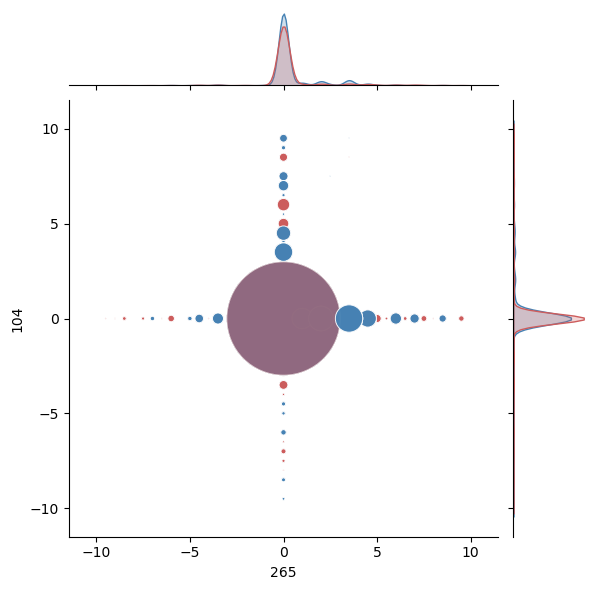

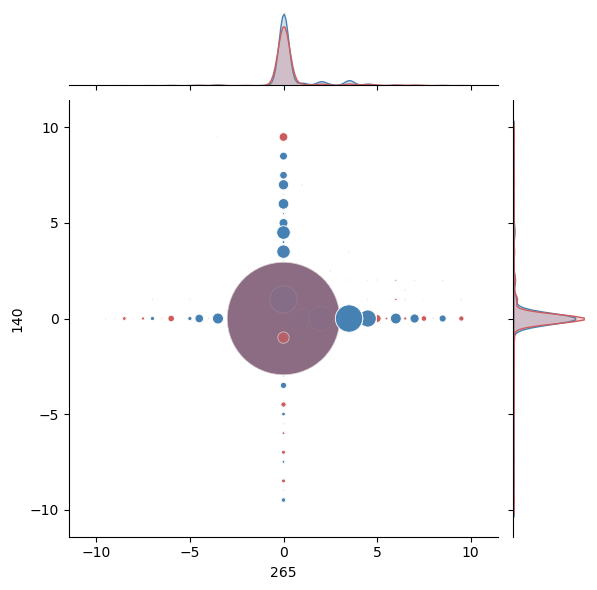

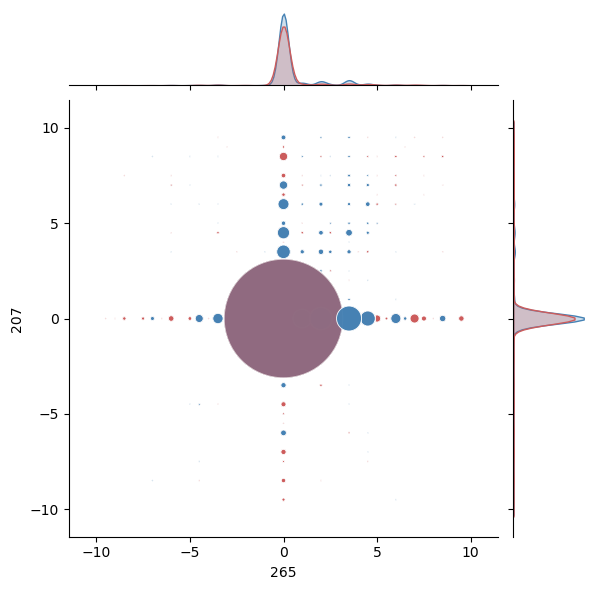

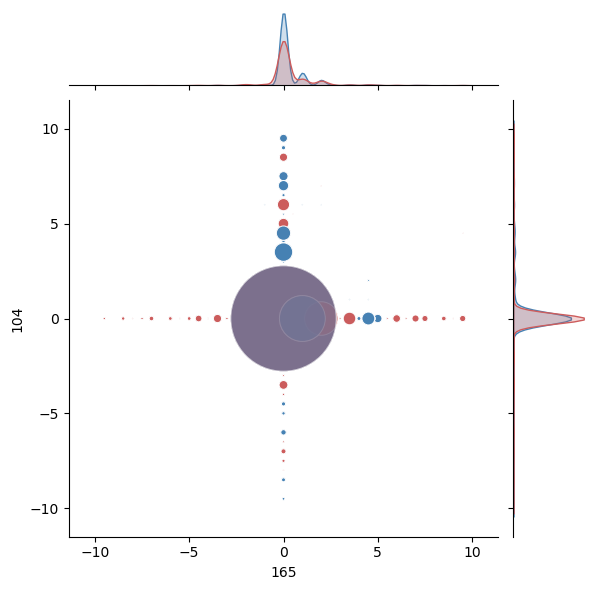

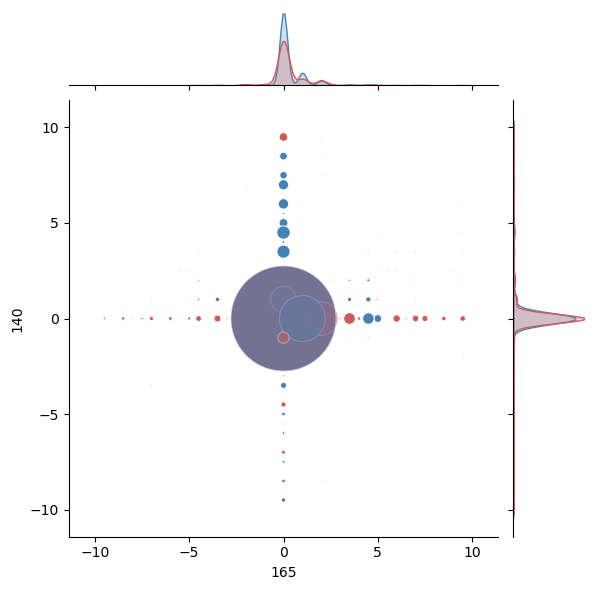

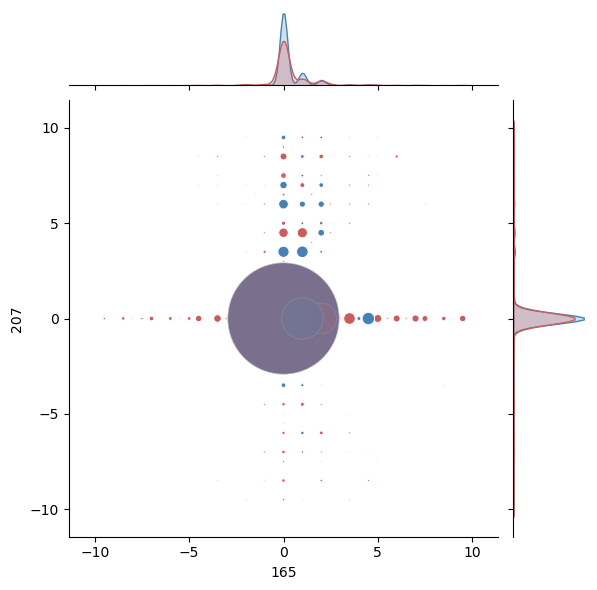

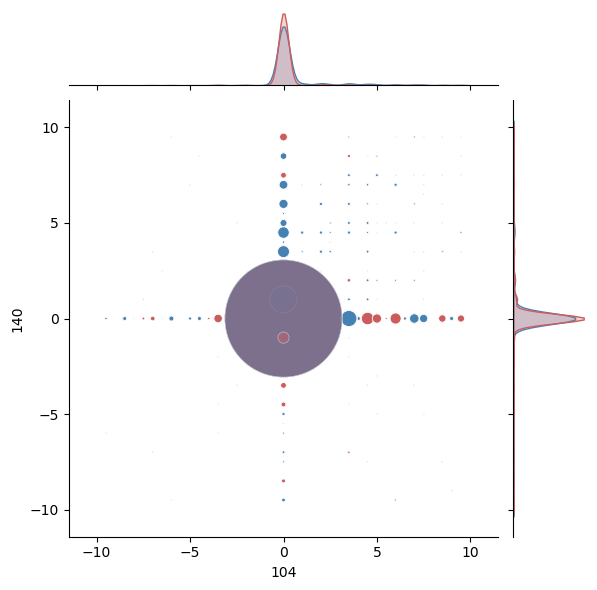

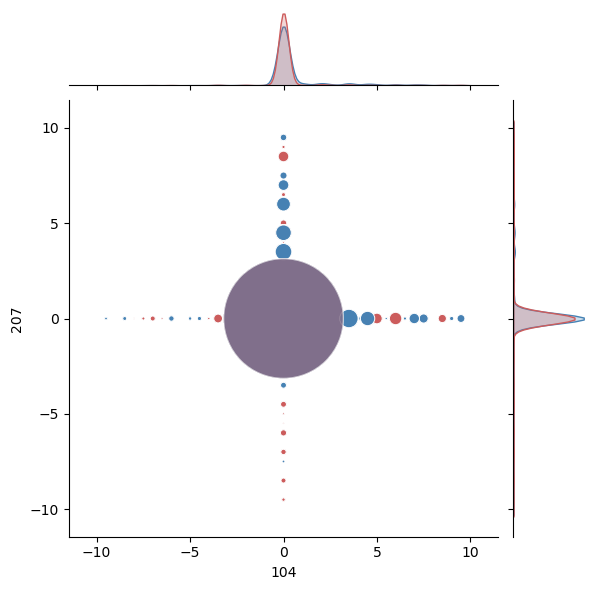

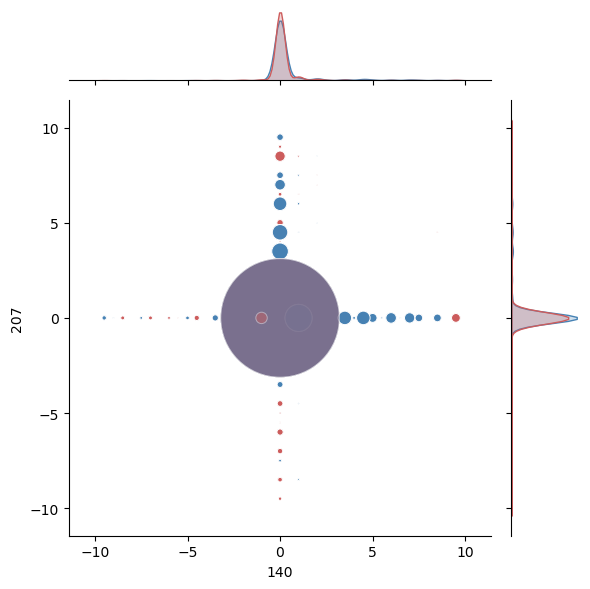

In [ ]:
#make a list of subsets of mylist, where each subset contains two distinct features
feature_pairs = [(f1, f2) for f1 in continuous_features for f2 in features_3]
index = 0

#make a 11x5 grid of subplots
# fig, ax = plt.subplots(9, 5, figsize=(10, 40))
# ax = ax.flatten()

#palette for coloring the points by the value of Y
palette = {0:'indianred', 1:'steelblue'}

#for each pair of distinct features in features_2 + top_courses[:6], plot a scatterplot of the two features. Color the points by the value of Y
for index, (feature1, feature2) in enumerate(feature_pairs):
    # Calculate the size of the dots based on the count of each pair of features
    counts = df.groupby([feature1, feature2]).size().reset_index(name='counts')
    merged_df = pd.merge(df, counts, on=[feature1, feature2])
    
    # Normalize counts to range between 0.3 and 1 for transparency
    norm_counts = 1 - 0.8*(merged_df['counts'] - merged_df['counts'].min()) / (merged_df['counts'].max() - merged_df['counts'].min())
    
    sns.jointplot(x=feature1, 
                  y=feature2, 
                  data=merged_df, 
                  hue='Y', 
                  palette=palette,
                  alpha=norm_counts,  # transparency varies with the count
                  s=merged_df['counts'],  # size of the dot varies with the count
                  legend=False)  # remove the legend from each subplot
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    #save figure to the folder 'jointplots' with the name 'jplot_{feature1}_vs_{feature2}.png'
    plt.savefig(f'jointplots2/jplot_{feature1}_vs_{feature2}.png')
    index += 1

plt.tight_layout()
plt.show()

In [40]:
df_entropy = pd.DataFrame(columns=features)
for x in features:
    values = df[x].unique()
    #group df by x, and calculate the percentage of Y=1 for each value of x
    grouped = df.groupby(x)['Y'].value_counts(normalize=True).unstack()
    #calculate the conditional entropy of Y given x
    entropy = -grouped.apply(lambda x: x*np.log2(x)).sum(axis=1)
    #compute entropy of Y given x
    df_entropy.loc['entropy', x] = np.average(entropy, weights=grouped.sum(axis=1))

df_entropy.T.sort_values('entropy', ascending=False)

,entropy
104,0.868726
207,0.793847
101,0.772991
160,0.756551
140,0.743414
105,0.724159
SEM9.5_cdf,0.698504
265,0.655569
317,0.654578
150,0.653556
